### Exploring SAG Assembly Metadata for plate AG-910

**Note:** Make sure you are using the biopy kernel when running this notebook.

In [1]:
import pandas as pd       # data frame importing and manipulation
import matplotlib.pyplot as plt  # plotting
import seaborn as sns # additional plotting library that allows us to make nice looking, simple plots easily
from collections import Counter  # Simple function that will count items in a list

plt.rcParams["figure.figsize"] = (8,6)

In [2]:
assembly_stats_file = "tbls/AG-910_assembly_stats_updated.csv"
df = pd.read_csv(assembly_stats_file)

#### Let's get a handle on this dataframe

What columns are in this data frame?

In [3]:
df.columns

Index(['Sample_ID', 'well_type', 'wga_cp', 'wgs_run_id', 'raw_read_count',
       'final_contigs_count', 'final_assembly_length', 'max_contig_length',
       'gc_content', 'checkM_estimated_completeness', 'number_multi_copy',
       'checkM_classification', 'SSU_classification_1'],
      dtype='object')

What sorts of well types do we have?

In [4]:
Counter(df['well_type'])

Counter({'1 cell': 317, 'No drop': 64, '10 cells': 3})

* '1 cell' indicates our single sorted cells
* 'No drop' are negative controls
* '10 cells' are positive controls

Let's look at how the different well types line up:

<AxesSubplot:xlabel='well_type', ylabel='raw_read_count'>

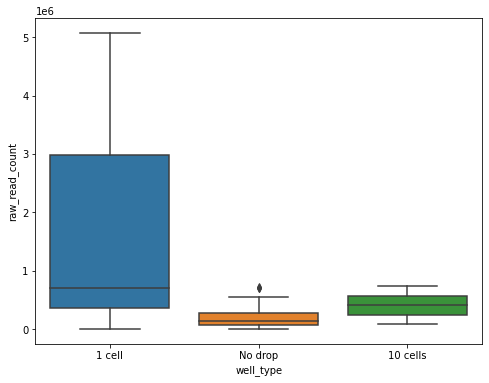

In [5]:
#df['raw_read_count'] = [int(i.replace(',','')) for i in df['raw_read_count']]
sns.boxplot(x = 'well_type', y = 'raw_read_count', data = df)

<AxesSubplot:xlabel='well_type', ylabel='final_assembly_length'>

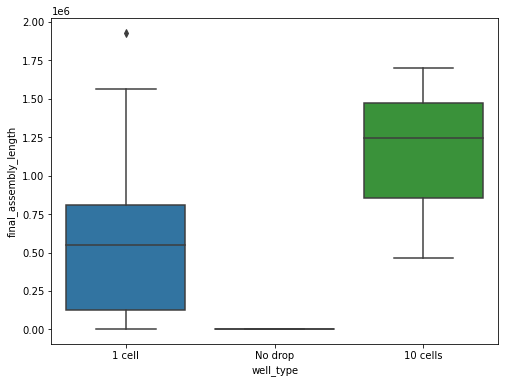

In [6]:
df[df['well_type'] == 'No drop'].dropna(subset = ['final_assembly_length'])
sns.boxplot(x = 'well_type', y = 'final_assembly_length', data = df)

Now let's consider only what we'd call successful assemblies.  Those 1 cell sorts for which the final_assembly_length is greater than 20kb.

In [7]:
# let's examine 'successful' cells, those with a final assembly length > 20kb

gdf = df[(df['final_assembly_length'] >= 20000) & (df['well_type'] == '1 cell')]

To get an overall description of the numeric columns, you can use the pd.describe() method:

In [8]:
gdf.describe()

,wga_cp,raw_read_count,final_contigs_count,final_assembly_length,max_contig_length,gc_content,checkM_estimated_completeness,number_multi_copy
count,226.000000,2.260000e+02,226.000000,2.260000e+02,226.000000,226.000000,226.000000,226.000000
mean,2.543889,2.222619e+06,30.070796,5.882286e+05,97201.115044,31.726725,37.688451,0.022124
std,0.820294,1.397194e+06,15.091553,3.793381e+05,72127.020420,5.263667,26.050413,0.174984
min,1.722054,6.158900e+04,2.000000,2.169600e+04,4603.000000,22.885452,0.000000,0.000000
25%,2.074146,6.176092e+05,20.000000,2.324260e+05,40837.250000,29.447514,12.677500,0.000000
50%,2.301344,2.552710e+06,30.000000,6.328365e+05,90563.000000,30.129477,40.540000,0.000000
75%,2.615989,3.260680e+06,39.750000,8.805288e+05,132836.000000,31.886013,56.630000,0.000000
max,7.279798,5.080878e+06,77.000000,1.930694e+06,376794.000000,62.754383,93.190000,2.000000


To look into distributions of values, use ```sns.histplot```

<AxesSubplot:xlabel='gc_content', ylabel='Count'>

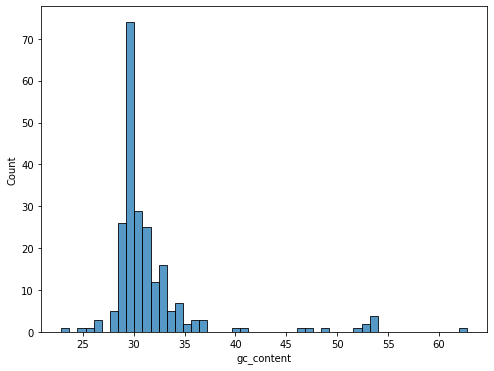

In [9]:
# gc_content distribution

sns.histplot(gdf['gc_content'])

<AxesSubplot:xlabel='final_assembly_length', ylabel='Count'>

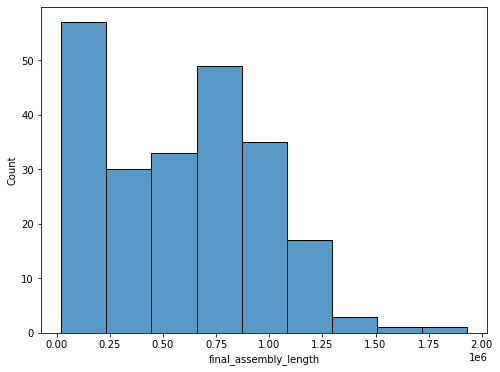

In [10]:
# assembly length distribution

sns.histplot(gdf['final_assembly_length'])

Examine distributions of other aspects of the assembly stats below:

### Let's now consider 16S ribosomal gene classifications

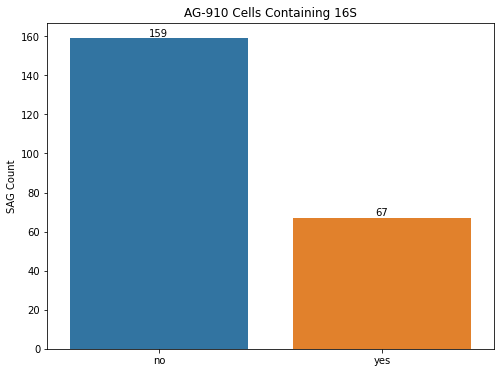

In [11]:
classified_16s = ['no' if 'no SSU' in i else 'yes' for i in gdf['SSU_classification_1']]

ax = sns.countplot(x = classified_16s)

ax.set(ylabel="SAG Count",
       title="AG-910 Cells Containing 16S")

# show count on top of bar
ax.bar_label(ax.containers[0])

plt.show()

Was there a difference in assembly length for cells that were and were not classified via 16S?

[Text(0, 0.5, 'Final Assembly Length'),
 Text(0.5, 0, 'Contains Classified 16S')]

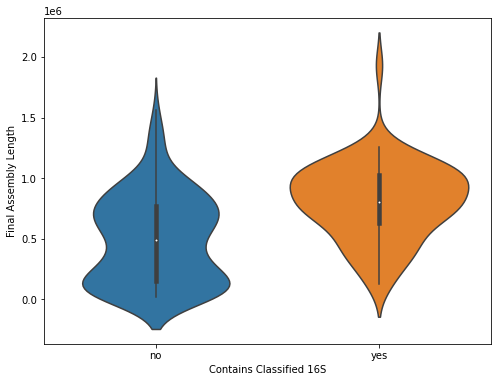

In [12]:
ax = sns.violinplot(x = classified_16s, y = 'final_assembly_length', data = gdf)

ax.set(ylabel = 'Final Assembly Length',
       xlabel = 'Contains Classified 16S')

How do assembly stats relate to phylogeny?

Look at assembly size distribution by phlogenetic Order for 16S containing cells:

In [13]:
df['SSU_classification_1'][1]

'k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Oceanospirillales;f__SAR86_clade;g__?;s__?'

We want to grab the order, which is the 4th item in this ';' separated phylogeny.  Since python uses 0-based indexing, order is indexed as 3.

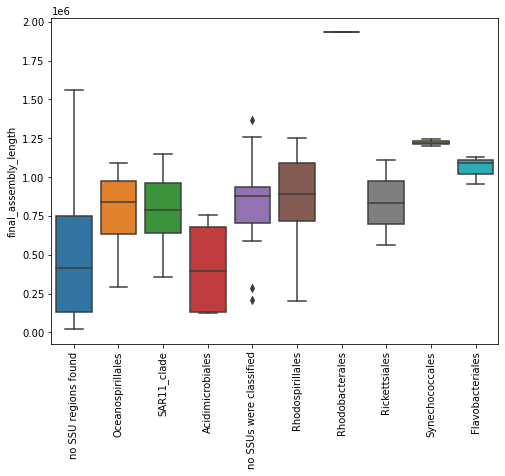

In [14]:
orders = [i if len(i.split(";")) == 1 else i.split(";")[3].replace("o__",'') for i in gdf['SSU_classification_1']]

ax = sns.boxplot(x = orders, y = gdf['final_assembly_length'])
ax.tick_params(axis='x', labelrotation = 90)
plt.show()

## Looking at multiple parameters at the same time.

Ramunas' favorite plot.  
It looks better in R, see cp_vs_completeness_stepanauskas.R

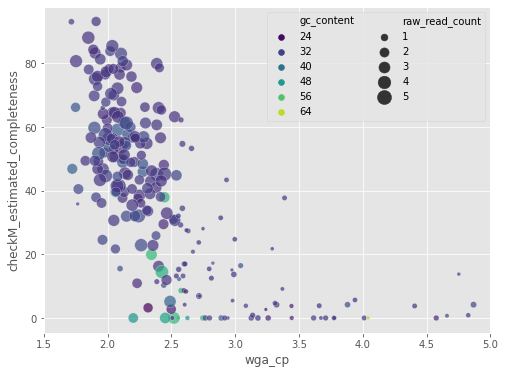

In [45]:
plt.style.use('ggplot')

ax = sns.scatterplot(x = 'wga_cp',
                y = 'checkM_estimated_completeness', 
                data = df, 
                hue = 'gc_content',
                size = df['raw_read_count'], 
               palette = 'viridis', 
               alpha = 0.7,   # makes dots transparent
                sizes = (10, 200))

ax.legend(loc = 'upper right', ncol = 2)
ax.set_xlim(1.5, 5)
plt.show()

Space for plotting other parameters against eachother...

## Integrating FACS data 

As Ramunas mentioned, along with genomic data, SCGC also produces optical and physical information per cell sequenced.  I'm going to pull in the stats table that contains Flow Cytometry data for AG-910's plate.

In [19]:
# flow cytometry dataframe
fcdf = pd.read_csv("tbls/AG-910-data-export.csv")
fcdf.head()

,eventnum,well,X531.40..488.,X572.27..488.,X692.40..488.,Trigger.Pulse.Width,SSC,FSC,estimated_diameter
0,1064,A01,17.635953,2.398523,6.245875,12412,3.888505,1.026341,0.18
1,3591,A02,139.505807,19.157932,31.037185,21147,6.363718,2.212945,0.24
2,5868,A03,251.061589,36.343337,141.778810,24448,14.878063,3.542553,0.29
3,7635,A04,61.474682,9.133397,23.114878,17575,8.599006,1.798386,0.23
4,10211,A05,14.736556,3.167615,21.989944,11511,10.225972,16.386173,0.53


We need to add a 'well' column to our main dataframe so that we can merge the flow cytometry data with our assembly data.

In [21]:
df['well'] = [i.split("-")[-1] for i in df['Sample_ID']]

fcdf = df.merge(fcdf, on = 'well', how = 'left')

In [22]:
fcdf.head()

,Sample_ID,well_type,wga_cp,wgs_run_id,raw_read_count,final_contigs_count,final_assembly_length,max_contig_length,gc_content,checkM_estimated_completeness,...,SSU_classification_1,well,eventnum,X531.40..488.,X572.27..488.,X692.40..488.,Trigger.Pulse.Width,SSC,FSC,estimated_diameter
0,AG-910-A01,1 cell,3.239536,AG-910,61589,14.0,72175.0,20059.0,24.669207,2.68,...,no SSU regions found,A01,1064.0,17.635953,2.398523,6.245875,12412.0,3.888505,1.026341,0.18
1,AG-910-A02,1 cell,1.769893,AG-910,2596242,26.0,502406.0,120161.0,33.125002,40.52,...,k__Bacteria;p__Proteobacteria;c__Gammaproteoba...,A02,3591.0,139.505807,19.157932,31.037185,21147.0,6.363718,2.212945,0.24
2,AG-910-A03,1 cell,2.200094,AG-910,2514079,32.0,240410.0,24968.0,47.106610,0.00,...,no SSU regions found,A03,5868.0,251.061589,36.343337,141.778810,24448.0,14.878063,3.542553,0.29
3,AG-910-A04,1 cell,1.959266,AG-910,2648866,24.0,473338.0,111384.0,32.749959,24.56,...,no SSU regions found,A04,7635.0,61.474682,9.133397,23.114878,17575.0,8.599006,1.798386,0.23
4,AG-910-A05,1 cell,8.659013,AG-910,210713,1.0,4106.0,4106.0,39.892840,0.00,...,no SSU regions found,A05,10211.0,14.736556,3.167615,21.989944,11511.0,10.225972,16.386173,0.53


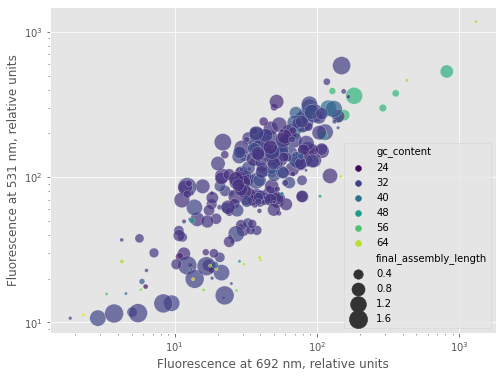

In [38]:
plt.style.use('ggplot')

ax = sns.scatterplot(x = 'X692.40..488.',
                y = 'X531.40..488.', 
                data = fcdf, 
                hue = 'gc_content',
                size = 'final_assembly_length',
                palette = 'viridis', 
                alpha = 0.7,   # makes dots transparent
                sizes = (10, 400))

ax.set(xscale = 'log',
       yscale = 'log', 
       xlabel = 'Fluorescence at 692 nm, relative units',
       ylabel = 'Fluorescence at 531 nm, relative units')

ax.legend(loc = 'best', ncol = 1)

plt.show()

There are a number of small assemblies with apparently higher gc_content in the lower lefthand corner of the plot.  What's going on there?  Extract their SAG IDs below:

In [43]:
fcdf[(fcdf['X531.40..488.'] < 50) & (fcdf['gc_content'] > 40)]

,Sample_ID,well_type,wga_cp,wgs_run_id,raw_read_count,final_contigs_count,final_assembly_length,max_contig_length,gc_content,checkM_estimated_completeness,...,SSU_classification_1,well,eventnum,X531.40..488.,X572.27..488.,X692.40..488.,Trigger.Pulse.Width,SSC,FSC,estimated_diameter
81,AG-910-D10,1 cell,10.962793,AG-910,201254,3.0,9326.0,3406.0,66.995496,0.0,...,no SSU regions found,D10,164147.0,11.253031,2.436233,2.282435,10316.0,1.213004,1.819742,0.23
159,AG-910-G16,1 cell,7.188865,AG-910,529064,1.0,5058.0,5058.0,46.065639,0.0,...,no SSU regions found,G16,318516.0,26.301645,6.156979,28.535356,13773.0,2.080541,1.026196,0.18
161,AG-910-G18,1 cell,15.352778,AG-910,342513,1.0,2721.0,2721.0,60.235208,0.0,...,no SSU regions found,G18,324036.0,16.813068,6.149196,5.794293,11421.0,6.783939,1.026341,0.18
224,AG-910-I06,1 cell,15.352778,AG-910,385884,2.0,11586.0,7492.0,64.379423,0.0,...,no SSU regions found,I06,369889.0,23.274605,5.072245,19.621157,14394.0,4.029820,1.225341,0.19
237,AG-910-I19,1 cell,15.352778,AG-910,575017,1.0,2943.0,2943.0,59.972817,0.0,...,no SSU regions found,I19,398538.0,16.573773,2.592366,27.184802,13475.0,9.950932,1.075514,0.18
279,AG-910-K13,1 cell,10.256919,AG-910,381281,2.0,5879.0,3106.0,56.131995,0.0,...,no SSU regions found,K13,489212.0,15.685400,2.341568,3.320781,11546.0,3.686289,1.026341,0.18
281,AG-910-K15,1 cell,6.727005,AG-910,291622,1.0,10075.0,10075.0,62.560794,0.0,...,no SSU regions found,K15,493996.0,24.561721,6.502035,17.745346,13898.0,7.016659,1.237977,0.19
318,AG-910-M04,1 cell,4.042103,AG-910,113338,9.0,43291.0,7399.0,62.754383,0.0,...,no SSU regions found,M04,575465.0,26.249946,1.986533,4.253272,14156.0,2.502865,1.113035,0.19
336,AG-910-M22,1 cell,8.830109,AG-910,131331,1.0,5557.0,5557.0,65.089077,0.0,...,no SSU regions found,M22,617443.0,26.911112,6.769653,40.292537,14022.0,18.569441,1.026341,0.18
351,AG-910-N13,1 cell,15.352778,AG-910,388313,2.0,6013.0,3677.0,63.329453,0.0,...,no SSU regions found,N13,647673.0,27.955816,5.366304,39.479761,14492.0,15.356042,1.208750,0.19


Explore their assembly outputs and QC directories. What do you think these things are?